<a href="https://colab.research.google.com/github/ramonfercruz/dados_enem/blob/main/EstudoDadosEnem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import os
import zipfile
from google.colab import drive
import pandas as pd
import plotly


In [2]:
#pd.options.plotting.backend = 'plotly'

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
diretorio = '/content/drive/MyDrive/Dados Enem/'

In [5]:
url = 'https://download.inep.gov.br/microdados/microdados_enem_2019.zip'

nome_arquivo = url.split('/')[-1:][0]
arquivo = os.path.join(diretorio, nome_arquivo)

In [6]:
def download_file(url, arquivo):
    with requests.get(url, stream=True, verify=False) as response:
        if response.status_code == 200:
          response.raise_for_status()
          lote = 1
          with open(arquivo, 'wb') as f:
              for lote, chunk in enumerate(response.iter_content(chunk_size=8192*1000)): 
                  f.write(chunk)
                  if lote % 10 == 0:
                    print('processado lote', lote + 1)
        else:
          print('erro', response.status_code)
          raise
    return local_filename

Local onde o arquivo está salvo requer conexão https, porém não possui certificado, por isso verify=Fase

In [7]:
if not os.path.exists(arquivo):
    download_file(url, arquivo)
    print('Arquivo salvo')
else:
    print('Arquivo ja existe')

  

Arquivo ja existe


In [8]:
with zipfile.ZipFile(arquivo) as filezip:
    lista = filezip.namelist()

In [9]:
lista

['LEIA-ME E DOCUMENTOS TÉCNICOS/',
 'LEIA-ME E DOCUMENTOS TÉCNICOS/matriz_referencia_enem.pdf',
 'LEIA-ME E DOCUMENTOS TÉCNICOS/Leia_Me_Enem_2019.pdf',
 'LEIA-ME E DOCUMENTOS TÉCNICOS/manual_de_redacao_do_enem_2019.pdf',
 'LEIA-ME E DOCUMENTOS TÉCNICOS/Edital_enem_2019.pdf',
 'PROVAS E GABARITOS/',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_AMPLIADA.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_SUPERAMPLIADA.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_03_DIA_1_BRANCO.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_04_DIA_1_ROSA.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_09_DIA_1_LARANJA_LEDOR.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_10_DIA_1_VERDE_LIBRAS.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_CAD_05_DIA_2_AMARELO.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO.pdf.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO_AMPLIADA.pdf',
 'PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_

In [10]:

with zipfile.ZipFile(arquivo) as file_zip:
  with file_zip.open('DADOS/MICRODADOS_ENEM_2019.csv','r') as file_csv:
    df_enem = pd.read_csv(file_csv, sep=';',nrows=0, encoding='latin1')


In [11]:
df_enem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [12]:
colunas = ['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_IDADE', 'TP_SEXO', 'SG_UF_NASCIMENTO','Q006', 'Q025', 'TP_COR_RACA','IN_TREINEIRO' , 'TP_PRESENCA_MT','TP_SEXO']

In [13]:
with zipfile.ZipFile(arquivo) as file_zip:
  with file_zip.open('DADOS/MICRODADOS_ENEM_2019.csv','r') as file_csv:
    df_enem = pd.read_csv(file_csv, sep=';', encoding='latin1',usecols=colunas)

In [14]:
df_enem = df_enem[(df_enem['TP_PRESENCA_MT'] == 1) & (df_enem['IN_TREINEIRO'] == 0)]

In [15]:
df_enem.NU_NOTA_MT.describe()

count    3.179862e+06
mean     5.206347e+02
std      1.092789e+02
min      0.000000e+00
25%      4.330000e+02
50%      4.973000e+02
75%      5.939000e+02
max      9.855000e+02
Name: NU_NOTA_MT, dtype: float64

In [16]:
dados_matematica = dict(df_enem.NU_NOTA_MT.describe())
dados_matematica

{'25%': 433.0,
 '50%': 497.3,
 '75%': 593.9,
 'count': 3179862.0,
 'max': 985.5,
 'mean': 520.6347082671743,
 'min': 0.0,
 'std': 109.27886385841352}

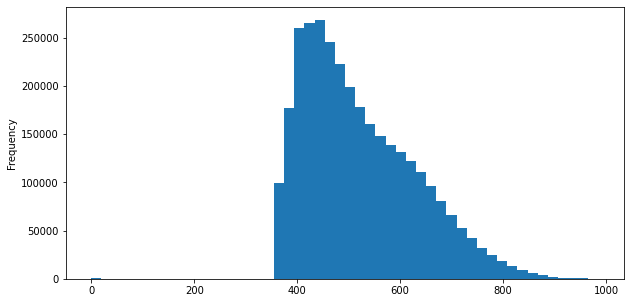

In [17]:
df_enem.NU_NOTA_MT.plot(kind='hist',figsize=(10, 5), bins=50)

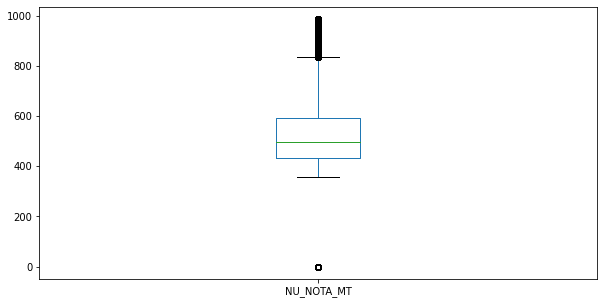

In [18]:
df_enem.NU_NOTA_MT.plot(kind='box', figsize=(10, 5))

In [19]:
dados_idade= dict(df_enem.NU_IDADE.describe())
dados_idade

{'25%': 18.0,
 '50%': 19.0,
 '75%': 23.0,
 'count': 3179862.0,
 'max': 92.0,
 'mean': 21.961335114542706,
 'min': 2.0,
 'std': 7.188408247688305}

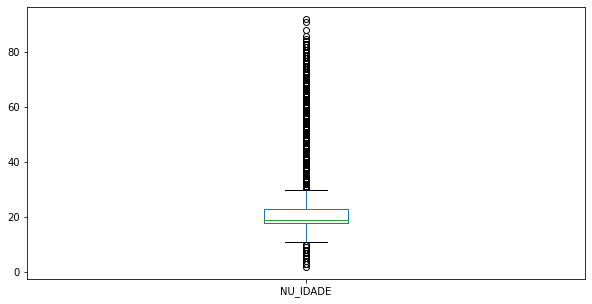

In [20]:
df_enem.NU_IDADE.plot(kind='box', figsize=(10, 5))

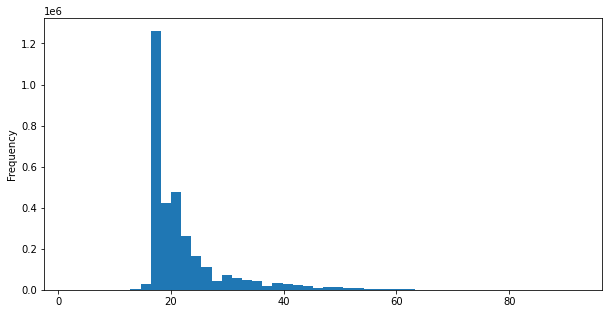

In [21]:
df_enem.NU_IDADE.plot(kind='hist',figsize=(10, 5), bins=50)

In [22]:
RENDA = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']

In [23]:
dict_renda = {}
for i, item in enumerate(RENDA):
  dict_renda[item] = i + 1


In [24]:
df_enem.Q006 = df_enem.Q006.map(dict_renda)

In [25]:
df_enem.rename(columns={'NU_NOTA_MT': 'Nota Matematica', 'Q006': 'Renda', 'Q025': 'Internet'}, inplace=True)

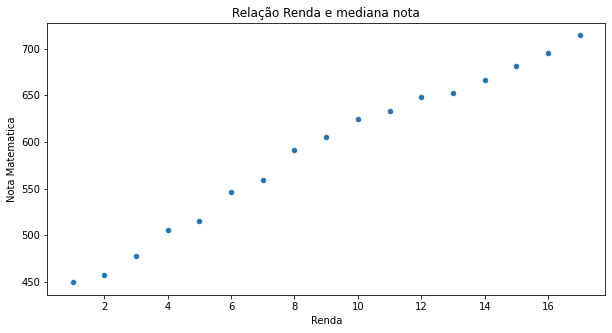

In [26]:
df_enem[['Nota Matematica', 'Renda']].groupby('Renda', as_index=False).median().plot(kind='scatter', x='Renda', y='Nota Matematica', title='Relação Renda e mediana nota', figsize=(10,5))

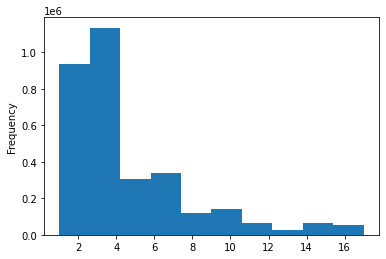

In [27]:
df_enem.Renda.plot.hist(bins=10)

In [28]:
df_enem.Renda.value_counts()

3     820891
2     796314
4     313742
5     304181
7     196732
6     142799
1     140106
8     120319
9      91555
10     49640
11     36143
14     35103
17     28610
15     28426
12     26455
13     25556
16     23290
Name: Renda, dtype: int64

In [29]:
dict_internet = {'A': 'Não',
                 'B': 'Sim'}

In [30]:
df_enem.Internet = df_enem.Internet.map(dict_internet)

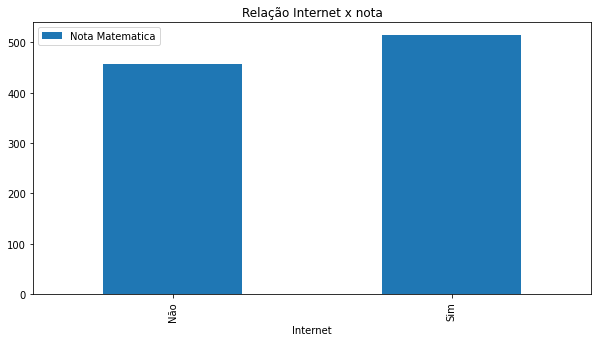

In [31]:
df_enem[['Nota Matematica', 'Internet']].groupby('Internet', as_index=False).median().plot(kind='bar', x='Internet', y='Nota Matematica', title='Relação Internet x nota', figsize=(10,5))

In [32]:
TP_COR_RACA = {0 : 'Não declarado', 1 : 'Branca', 2 : 'Preta', 3 : 'Parda', 4 : 'Amarela', 5 : 'Indígena '}

In [33]:
df_enem.TP_COR_RACA = df_enem.TP_COR_RACA.map(TP_COR_RACA)

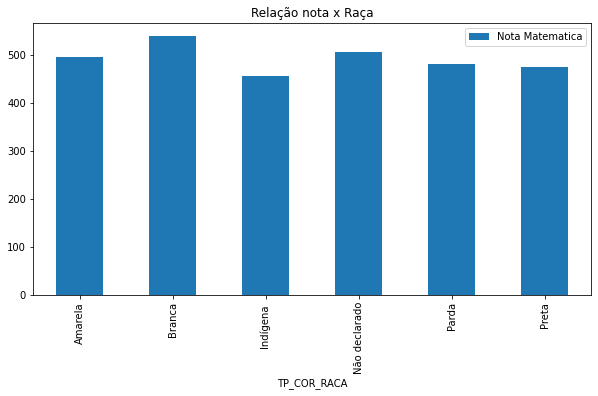

In [34]:
df_enem[['Nota Matematica', 'TP_COR_RACA']].groupby('TP_COR_RACA', as_index=False).median().plot(kind='bar', x='TP_COR_RACA', y='Nota Matematica', title='Relação nota x Raça', figsize=(10,5))

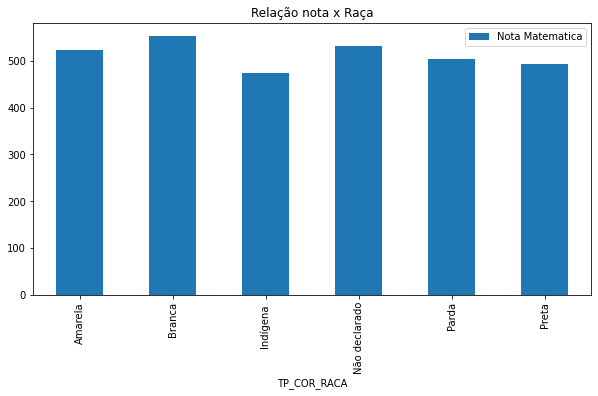

In [35]:
df_enem[['Nota Matematica', 'TP_COR_RACA']].groupby('TP_COR_RACA', as_index=False).mean().plot(kind='bar', x='TP_COR_RACA', y='Nota Matematica', title='Relação nota x Raça', figsize=(10,5))

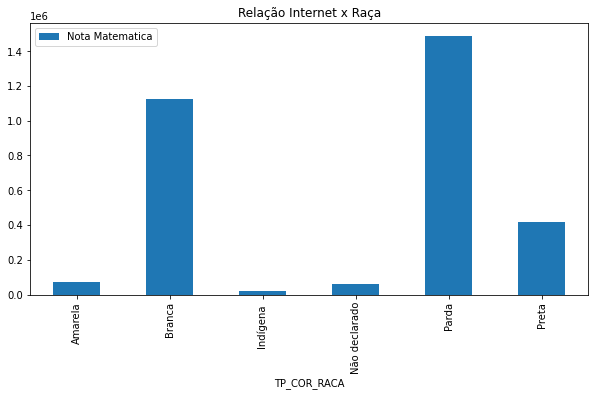

In [36]:
df_enem[['Nota Matematica', 'TP_COR_RACA']].groupby('TP_COR_RACA', as_index=False).count().plot(kind='bar', x='TP_COR_RACA', y='Nota Matematica', title='Relação Internet x Raça', figsize=(10,5))

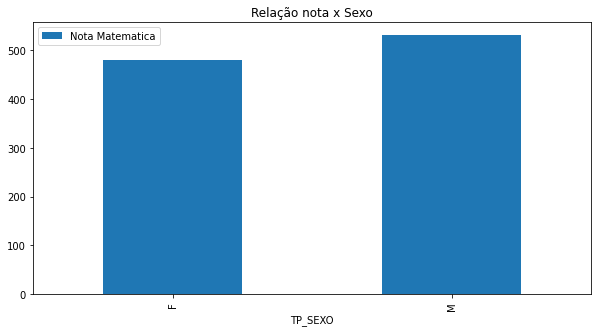

In [46]:
df_enem[['Nota Matematica', 'TP_SEXO']].groupby('TP_SEXO', as_index=False).median().plot(kind='bar', x='TP_SEXO', y='Nota Matematica', title='Relação Sexo x Sexo', figsize=(10,5))